# Lead Scoring Case Study

# Problem Statement:
#### An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

#### The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.

#### X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

#### X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

# Importing important libraries and Reading Data

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To Scale our data
from sklearn.preprocessing import scale

In [2]:
leads = pd.read_csv('Leads.csv')
leads.head(5)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
#Sanity Check
print(leads.shape)
print(leads.describe())
leads.info()

(9240, 37)
         Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000          

In [4]:
# Checking for Duplicates
print(leads.shape)
print(leads.nunique())

(9240, 37)
Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article

No Duplicates

### Data Preparation

In [5]:
#Checking the value counts on some features
print(leads['Do Not Email'].value_counts())
print(leads['Do Not Call'].value_counts())
print(leads['Country'].value_counts().head(5))
print(leads['Specialization'].value_counts())

No     8506
Yes     734
Name: Do Not Email, dtype: int64
No     9238
Yes       2
Name: Do Not Call, dtype: int64
India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
Name: Country, dtype: int64
Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73


In [6]:
#From Above, we can see that column 'Do Not Call' has little to no variation. Hence removing this variable.
leads.drop('Do Not Call',inplace=True,axis=1)

In [7]:
#Printing value counts of some other features
print(leads['What matters most to you in choosing a course'].value_counts())
print(leads['Search'].value_counts())
print(leads['Magazine'].value_counts())
print(leads['Newspaper Article'].value_counts())
print(leads['X Education Forums'].value_counts())
print(leads['Newspaper'].value_counts())
print(leads['Digital Advertisement'].value_counts())
print(leads['Through Recommendations'].value_counts())
print(leads['Receive More Updates About Our Courses'].value_counts())
print(leads['Update me on Supply Chain Content'].value_counts())
print(leads['Get updates on DM Content'].value_counts())
print(leads['I agree to pay the amount through cheque'].value_counts())

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64
No     9226
Yes      14
Name: Search, dtype: int64
No    9240
Name: Magazine, dtype: int64
No     9238
Yes       2
Name: Newspaper Article, dtype: int64
No     9239
Yes       1
Name: X Education Forums, dtype: int64
No     9239
Yes       1
Name: Newspaper, dtype: int64
No     9236
Yes       4
Name: Digital Advertisement, dtype: int64
No     9233
Yes       7
Name: Through Recommendations, dtype: int64
No    9240
Name: Receive More Updates About Our Courses, dtype: int64
No    9240
Name: Update me on Supply Chain Content, dtype: int64
No    9240
Name: Get updates on DM Content, dtype: int64
No    9240
Name: I agree to pay the amount through cheque, dtype: int64


In [8]:
# All of the features above contain no or very little variance and hence would just be noice during Model building. So removing all these variables
not_required = ['I agree to pay the amount through cheque','What matters most to you in choosing a course','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content']
leads.drop(not_required,inplace=True,axis=1)

In [9]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 24 columns):
Prospect ID                               9240 non-null object
Lead Number                               9240 non-null int64
Lead Origin                               9240 non-null object
Lead Source                               9204 non-null object
Do Not Email                              9240 non-null object
Converted                                 9240 non-null int64
TotalVisits                               9103 non-null float64
Total Time Spent on Website               9240 non-null int64
Page Views Per Visit                      9103 non-null float64
Last Activity                             9137 non-null object
Country                                   6779 non-null object
Specialization                            7802 non-null object
How did you hear about X Education        7033 non-null object
What is your current occupation           6550 non-null object
Tags        

In [10]:
# Checking the percentage of missing values
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Prospect ID                                0.00
Lead Number                                0.00
Lead Origin                                0.00
Lead Source                                0.39
Do Not Email                               0.00
Converted                                  0.00
TotalVisits                                1.48
Total Time Spent on Website                0.00
Page Views Per Visit                       1.48
Last Activity                              1.11
Country                                   26.63
Specialization                            15.56
How did you hear about X Education        23.89
What is your current occupation           29.11
Tags                                      36.29
Lead Quality                              51.59
Lead Profile                              29.32
City                                      15.37
Asymmetrique Activity Index               45.65
Asymmetrique Profile Index                45.65
Asymmetrique Activity Score             

# We see that below columns have high number of missing values
#### Lead Quality
#### Asymmetrique Activity Index 
#### Asymmetrique Profile Index  
#### Asymmetrique Activity Score 
#### Asymmetrique Profile Score
#### Tags
### So removing these columns

In [11]:
not_required = ['Lead Quality','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score','Tags']
leads.drop(not_required,inplace=True,axis=1)

In [12]:
# Checking the percentage of missing values
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Prospect ID                                0.00
Lead Number                                0.00
Lead Origin                                0.00
Lead Source                                0.39
Do Not Email                               0.00
Converted                                  0.00
TotalVisits                                1.48
Total Time Spent on Website                0.00
Page Views Per Visit                       1.48
Last Activity                              1.11
Country                                   26.63
Specialization                            15.56
How did you hear about X Education        23.89
What is your current occupation           29.11
Lead Profile                              29.32
City                                      15.37
A free copy of Mastering The Interview     0.00
Last Notable Activity                      0.00
dtype: float64

In [13]:
print(leads['Lead Profile'].value_counts())
print(leads['How did you hear about X Education'].value_counts())
print(leads['What is your current occupation'].value_counts())
print(leads['Specialization'].value_counts())
print(leads['Country'].value_counts())
print(leads['City'].value_counts())

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64
Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64
Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64
Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Op

In [14]:
#Lets populate missing values as select and we will then remove column 'Select' when creating dummy variables. SO that minimal information is lost
leads.loc[pd.isnull(leads['Lead Profile']),['Lead Profile']] = 'Select'
leads.loc[pd.isnull(leads['How did you hear about X Education']),['How did you hear about X Education']] = 'Select'
leads.loc[pd.isnull(leads['What is your current occupation']),['What is your current occupation']] = 'Select'
leads.loc[pd.isnull(leads['Specialization']),['Specialization']] = 'Select'
leads.loc[pd.isnull(leads['Country']),['Country']] = 'Select'
leads.loc[pd.isnull(leads['City']),['City']] = 'Select'

In [15]:
# Checking the percentage of missing values
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Prospect ID                               0.00
Lead Number                               0.00
Lead Origin                               0.00
Lead Source                               0.39
Do Not Email                              0.00
Converted                                 0.00
TotalVisits                               1.48
Total Time Spent on Website               0.00
Page Views Per Visit                      1.48
Last Activity                             1.11
Country                                   0.00
Specialization                            0.00
How did you hear about X Education        0.00
What is your current occupation           0.00
Lead Profile                              0.00
City                                      0.00
A free copy of Mastering The Interview    0.00
Last Notable Activity                     0.00
dtype: float64

In [16]:
# Number of missing values for 'Total Visits' is 
1.48*len(leads.index)/100

136.752

In [17]:
# Lets remove these rows
leads = leads[~np.isnan(leads.TotalVisits)]
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Prospect ID                               0.00
Lead Number                               0.00
Lead Origin                               0.00
Lead Source                               0.32
Do Not Email                              0.00
Converted                                 0.00
TotalVisits                               0.00
Total Time Spent on Website               0.00
Page Views Per Visit                      0.00
Last Activity                             0.00
Country                                   0.00
Specialization                            0.00
How did you hear about X Education        0.00
What is your current occupation           0.00
Lead Profile                              0.00
City                                      0.00
A free copy of Mastering The Interview    0.00
Last Notable Activity                     0.00
dtype: float64

In [18]:
# 0.32% of Lead Source is missing, Lets look at the value count
leads['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Live Chat               2
Social Media            2
Press_Release           2
NC_EDM                  1
testone                 1
welearnblog_Home        1
WeLearn                 1
youtubechannel          1
blog                    1
Pay per Click Ads       1
Name: Lead Source, dtype: int64

In [19]:
# Since we can't assign the blank values. Lets remove this too.

leads = leads.loc[~pd.isnull(leads['Lead Source'])]
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 18 columns):
Prospect ID                               9074 non-null object
Lead Number                               9074 non-null int64
Lead Origin                               9074 non-null object
Lead Source                               9074 non-null object
Do Not Email                              9074 non-null object
Converted                                 9074 non-null int64
TotalVisits                               9074 non-null float64
Total Time Spent on Website               9074 non-null int64
Page Views Per Visit                      9074 non-null float64
Last Activity                             9074 non-null object
Country                                   9074 non-null object
Specialization                            9074 non-null object
How did you hear about X Education        9074 non-null object
What is your current occupation           9074 non-null object
Lead Profile

In [20]:
#Lets convert all string variables to upper case
categorical_features = ['Lead Origin','Lead Source','Do Not Email','Last Activity','Country','Specialization','How did you hear about X Education','What is your current occupation','What is your current occupation','Lead Profile','City','A free copy of Mastering The Interview','Last Notable Activity']
leads[categorical_features] = leads[categorical_features].apply(lambda x: x.astype(str).str.upper())
leads.head(10)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,Lead Profile,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,OLARK CHAT,NO,0,0.0,0,0.0,PAGE VISITED ON WEBSITE,SELECT,SELECT,SELECT,UNEMPLOYED,SELECT,SELECT,NO,MODIFIED
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,ORGANIC SEARCH,NO,0,5.0,674,2.5,EMAIL OPENED,INDIA,SELECT,SELECT,UNEMPLOYED,SELECT,SELECT,NO,EMAIL OPENED
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,LANDING PAGE SUBMISSION,DIRECT TRAFFIC,NO,1,2.0,1532,2.0,EMAIL OPENED,INDIA,BUSINESS ADMINISTRATION,SELECT,STUDENT,POTENTIAL LEAD,MUMBAI,YES,EMAIL OPENED
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,LANDING PAGE SUBMISSION,DIRECT TRAFFIC,NO,0,1.0,305,1.0,UNREACHABLE,INDIA,MEDIA AND ADVERTISING,WORD OF MOUTH,UNEMPLOYED,SELECT,MUMBAI,NO,MODIFIED
4,3256f628-e534-4826-9d63-4a8b88782852,660681,LANDING PAGE SUBMISSION,GOOGLE,NO,1,2.0,1428,1.0,CONVERTED TO LEAD,INDIA,SELECT,OTHER,UNEMPLOYED,SELECT,MUMBAI,NO,MODIFIED
5,2058ef08-2858-443e-a01f-a9237db2f5ce,660680,API,OLARK CHAT,NO,0,0.0,0,0.0,OLARK CHAT CONVERSATION,SELECT,SELECT,SELECT,SELECT,SELECT,SELECT,NO,MODIFIED
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,LANDING PAGE SUBMISSION,GOOGLE,NO,1,2.0,1640,2.0,EMAIL OPENED,INDIA,SUPPLY CHAIN MANAGEMENT,ONLINE SEARCH,UNEMPLOYED,POTENTIAL LEAD,MUMBAI,NO,MODIFIED
7,20ef72a2-fb3b-45e0-924e-551c5fa59095,660664,API,OLARK CHAT,NO,0,0.0,0,0.0,OLARK CHAT CONVERSATION,SELECT,SELECT,SELECT,SELECT,SELECT,SELECT,NO,MODIFIED
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,660624,LANDING PAGE SUBMISSION,DIRECT TRAFFIC,NO,0,2.0,71,2.0,EMAIL OPENED,INDIA,IT PROJECTS MANAGEMENT,SELECT,SELECT,SELECT,THANE & OUTSKIRTS,YES,EMAIL OPENED
9,af465dfc-7204-4130-9e05-33231863c4b5,660616,API,GOOGLE,NO,0,4.0,58,4.0,EMAIL OPENED,INDIA,FINANCE MANAGEMENT,WORD OF MOUTH,SELECT,SELECT,MUMBAI,NO,EMAIL OPENED


In [21]:
#Converting YES to 1 and NO to 0
leads['Do Not Email'] = leads['Do Not Email'].map({'YES': 1, 'NO': 0})
leads['A free copy of Mastering The Interview'] = leads['A free copy of Mastering The Interview'].map({'YES': 1, 'NO': 0})
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 18 columns):
Prospect ID                               9074 non-null object
Lead Number                               9074 non-null int64
Lead Origin                               9074 non-null object
Lead Source                               9074 non-null object
Do Not Email                              9074 non-null int64
Converted                                 9074 non-null int64
TotalVisits                               9074 non-null float64
Total Time Spent on Website               9074 non-null int64
Page Views Per Visit                      9074 non-null float64
Last Activity                             9074 non-null object
Country                                   9074 non-null object
Specialization                            9074 non-null object
How did you hear about X Education        9074 non-null object
What is your current occupation           9074 non-null object
Lead Profile 

In [22]:
leads.head(5)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,Lead Profile,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,OLARK CHAT,0,0,0.0,0,0.0,PAGE VISITED ON WEBSITE,SELECT,SELECT,SELECT,UNEMPLOYED,SELECT,SELECT,0,MODIFIED
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,ORGANIC SEARCH,0,0,5.0,674,2.5,EMAIL OPENED,INDIA,SELECT,SELECT,UNEMPLOYED,SELECT,SELECT,0,EMAIL OPENED
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,LANDING PAGE SUBMISSION,DIRECT TRAFFIC,0,1,2.0,1532,2.0,EMAIL OPENED,INDIA,BUSINESS ADMINISTRATION,SELECT,STUDENT,POTENTIAL LEAD,MUMBAI,1,EMAIL OPENED
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,LANDING PAGE SUBMISSION,DIRECT TRAFFIC,0,0,1.0,305,1.0,UNREACHABLE,INDIA,MEDIA AND ADVERTISING,WORD OF MOUTH,UNEMPLOYED,SELECT,MUMBAI,0,MODIFIED
4,3256f628-e534-4826-9d63-4a8b88782852,660681,LANDING PAGE SUBMISSION,GOOGLE,0,1,2.0,1428,1.0,CONVERTED TO LEAD,INDIA,SELECT,OTHER,UNEMPLOYED,SELECT,MUMBAI,0,MODIFIED


# Data Analysis:

In [23]:
#checking for outliers
numeric_features = leads[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
numeric_features.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151
std,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
90%,7.000000,1373.000000,5.000000
95%,10.000000,1557.000000,6.000000
99%,17.000000,1839.000000,9.000000


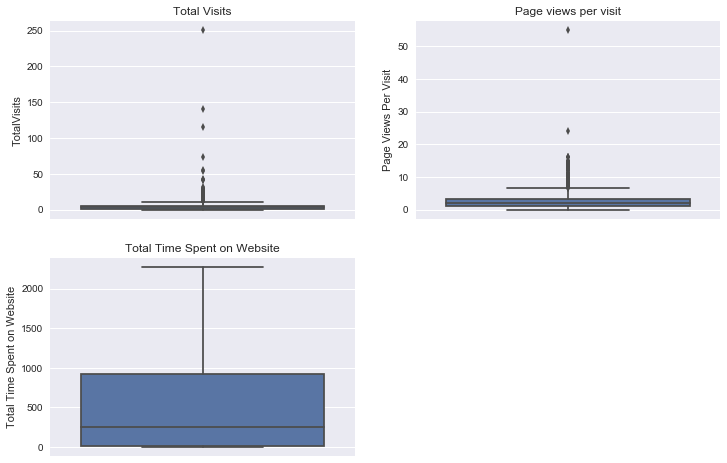

In [24]:
#Checking for any outliers in numeric components

# subplot 1
sns.set(rc={'figure.figsize':(12,8)})
plt.subplot(2, 2, 1)
plt.title('Total Visits')
sns.boxplot(y=leads['TotalVisits'])

# subplot 2
plt.subplot(2, 2, 2)
plt.title('Page views per visit')
sns.boxplot(y=leads['Page Views Per Visit'])


# subplot 3
plt.subplot(2, 2, 3)
plt.title('Total Time Spent on Website')
sns.boxplot(y=leads['Total Time Spent on Website'])

In [25]:
# We can clearly see that there are outliers for number of visits and Page Views per visit lets remove those rows too.
leads = leads[leads['TotalVisits']<=25]
leads.shape

(9052, 18)

In [26]:
#checking for outliers
numeric_features = leads[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
numeric_features.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9052.000000,9052.000000,9052.000000
mean,3.334180,483.018118,2.357406
std,3.306568,545.555210,2.078127
min,0.000000,0.000000,0.000000
25%,1.000000,10.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,924.000000,3.000000
90%,7.000000,1374.900000,5.000000
95%,9.000000,1557.000000,6.000000
99%,16.000000,1839.000000,9.000000


In [27]:
# We can clearly see that there are outliers for number of visits and Page Views per visit lets remove those rows too.
leads = leads[leads['Page Views Per Visit']<=15]
leads.shape

(9048, 18)

In [28]:
#checking for outliers
numeric_features = leads[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
numeric_features.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9048.000000,9048.000000,9048.000000
mean,3.327697,482.994584,2.350491
std,3.292078,545.531995,2.051093
min,0.000000,0.000000,0.000000
25%,1.000000,10.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,924.000000,3.000000
90%,7.000000,1374.300000,5.000000
95%,9.000000,1557.000000,6.000000
99%,16.000000,1839.000000,9.000000


In [29]:
leads_bkup = leads

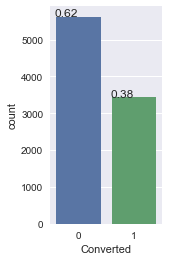

In [30]:
#### Lets plot the Conversion Rate to get an idea of what percentage of customers have been converted

sns.set(rc={'figure.figsize':(2,4)})
total = float(len(leads['Converted']))
ax = sns.countplot(x='Converted',data=leads)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="right")
plt.show()

In [31]:
###  Create a function for Finding Categorical Weighted Conversion Rate

def find_categorical_weighted_average(data1,category):
    group_category_count = pd.DataFrame({"Total Count": data1.groupby(category).size()}).reset_index()
    group_category_Conversion_rate = pd.DataFrame({"Conversion count": data1.groupby(category)['Converted'].sum()}).reset_index()
    
    Merged_df = group_category_count.merge(group_category_Conversion_rate)
    Merged_df['Weighted Conversion Rate'] = Merged_df['Conversion count'] * (Merged_df['Conversion count']/Merged_df['Total Count'])
    
    total_Conversion_count = Merged_df['Conversion count'].sum()
    
    Merged_df['Weighted Conversion Rate'] = Merged_df['Weighted Conversion Rate']/total_Conversion_count    
    return Merged_df['Weighted Conversion Rate'].sum()

In [32]:
#### Lets create a plotting function to plot the default rate
def plot_bar(data1,name):
    y = "Conversion Rate for "+name
    sns.set(rc={'figure.figsize':(20,15)})
    plt.title(y)
    sns.barplot(x='Category',y='Conversion Rate',data=data1)
    plt.yscale('log')

    plt.show()

In [33]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9048 entries, 0 to 9239
Data columns (total 18 columns):
Prospect ID                               9048 non-null object
Lead Number                               9048 non-null int64
Lead Origin                               9048 non-null object
Lead Source                               9048 non-null object
Do Not Email                              9048 non-null int64
Converted                                 9048 non-null int64
TotalVisits                               9048 non-null float64
Total Time Spent on Website               9048 non-null int64
Page Views Per Visit                      9048 non-null float64
Last Activity                             9048 non-null object
Country                                   9048 non-null object
Specialization                            9048 non-null object
How did you hear about X Education        9048 non-null object
What is your current occupation           9048 non-null object
Lead Profile 

In [34]:
category_list =['Lead Origin','Lead Source','Do Not Email','Last Activity','Country','Specialization','How did you hear about X Education','What is your current occupation','Lead Profile','City','A free copy of Mastering The Interview','Last Notable Activity']

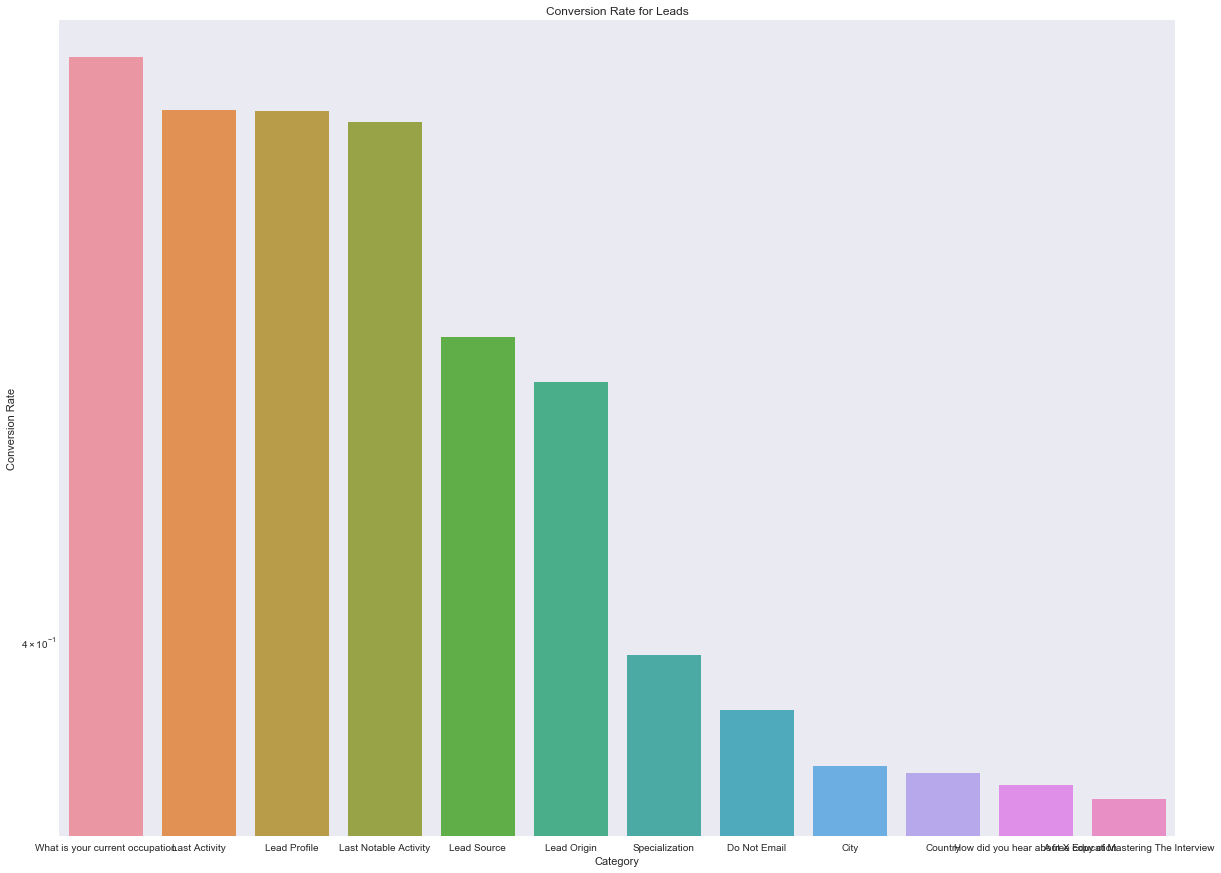

In [35]:
leads_Conversion_rate = {}

for i in category_list:
    weighted_average = find_categorical_weighted_average(leads,i)
    leads_Conversion_rate[i] =  weighted_average
    
leads_Conversion_rate_df = pd.DataFrame.from_dict(leads_Conversion_rate,orient="index",columns=["rate"]).reset_index()
leads_Conversion_rate_df.sort_values(by='rate',ascending=False,inplace=True)
leads_Conversion_rate_df.columns=['Category','Conversion Rate']
leads_Conversion_rate_df
plot_bar(leads_Conversion_rate_df,"Leads")

#### Occupation, Last Actvity, Lead Profile seem to be the significant factors

In [36]:
leads_Conversion_rate_df.to_csv("Conversion Rate.csv")

### Creating Dummy Variables


In [37]:
# Creating dummy variables for the variable 'Lead Origin', Removing one of the dummies, and
# concatenating with the Leads Dataframe
df = pd.get_dummies(leads['Lead Origin'], prefix='Lead Origin')
df1 = df.drop(['Lead Origin_LEAD IMPORT'], 1)
leads = pd.concat([leads,df1], axis=1)

In [38]:
# Creating dummy variables for the variable 'Lead Source', Removing one of the dummies, and
# concatenating with the Leads Dataframe
df = pd.get_dummies(leads['Lead Source'], prefix='Lead Source')
df1 = df.drop(['Lead Source_BLOG'], 1)
leads = pd.concat([leads,df1], axis=1)

In [39]:
# Creating dummy variables for the variable 'Last Activity', Removing one of the dummies, and
# concatenating with the Leads Dataframe
df = pd.get_dummies(leads['Last Activity'], prefix='Last Activity')
df1 = df.drop(['Last Activity_RESUBSCRIBED TO EMAILS'], 1)
leads = pd.concat([leads,df1], axis=1)

In [40]:
# Creating dummy variables for the variable 'Country', Removing one of the dummies, and
# concatenating with the Leads Dataframe
df = pd.get_dummies(leads['Country'], prefix='Country')
df1 = df.drop(['Country_SELECT'], 1)
leads = pd.concat([leads,df1], axis=1)

In [41]:
# Creating dummy variables for the variable 'Specialization', Removing one of the dummies, and
# concatenating with the Leads Dataframe
df = pd.get_dummies(leads['Specialization'], prefix='Specialization')
df1 = df.drop(['Specialization_SELECT'], 1)
leads = pd.concat([leads,df1], axis=1)

In [42]:
# Creating dummy variables for the variable 'How did you hear about X Education', Removing one of the dummies, and
# concatenating with the Leads Dataframe
df = pd.get_dummies(leads['How did you hear about X Education'], prefix='How did you hear about X Education')
df1 = df.drop(['How did you hear about X Education_SELECT'], 1)
leads = pd.concat([leads,df1], axis=1)

In [43]:
# Creating dummy variables for the variable 'What is your current occupation', Removing one of the dummies, and
# concatenating with the Leads Dataframe
df = pd.get_dummies(leads['What is your current occupation'], prefix='What is your current occupation')
df1 = df.drop(['What is your current occupation_SELECT'], 1)
leads = pd.concat([leads,df1], axis=1)

In [44]:
# Creating dummy variables for the variable 'Lead Profile', Removing one of the dummies, and
# concatenating with the Leads Dataframe
df = pd.get_dummies(leads['Lead Profile'], prefix='Lead Profile')
df1 = df.drop(['Lead Profile_SELECT'], 1)
leads = pd.concat([leads,df1], axis=1)

In [45]:
# Creating dummy variables for the variable 'City', Removing one of the dummies, and
# concatenating with the Leads Dataframe
df = pd.get_dummies(leads['City'], prefix='City')
df1 = df.drop(['City_SELECT'], 1)
leads = pd.concat([leads,df1], axis=1)

In [46]:
# Creating dummy variables for the variable 'Last Notable Activity', Removing one of the dummies, and
# concatenating with the Leads Dataframe
df = pd.get_dummies(leads['Last Notable Activity'], prefix='Last Notable Activity')
df1 = df.drop(['Last Notable Activity_RESUBSCRIBED TO EMAILS'], 1)
leads = pd.concat([leads,df1], axis=1)

### Now that we have created the dummies. Lets remove the original columns from the dataframe

In [47]:
leads = leads.drop(['Lead Origin','Lead Source','Last Activity','Country','Specialization',
                    'How did you hear about X Education','What is your current occupation',
                    'Lead Profile','City',
                    'Last Notable Activity'],axis=1)
leads.shape

(9048, 143)

In [48]:
leads.head(4)

,Prospect ID,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_LANDING PAGE SUBMISSION,...,Last Notable Activity_EMAIL RECEIVED,Last Notable Activity_FORM SUBMITTED ON WEBSITE,Last Notable Activity_HAD A PHONE CONVERSATION,Last Notable Activity_MODIFIED,Last Notable Activity_OLARK CHAT CONVERSATION,Last Notable Activity_PAGE VISITED ON WEBSITE,Last Notable Activity_SMS SENT,Last Notable Activity_UNREACHABLE,Last Notable Activity_UNSUBSCRIBED,Last Notable Activity_VIEW IN BROWSER LINK CLICKED
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0,0.0,0,0.0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,0,5.0,674,2.5,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,0,1,2.0,1532,2.0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,0,1.0,305,1.0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


### Checking the Convertion Rate

In [49]:
convertion = (sum(leads['Converted'])/len(leads['Converted'].index))*100
convertion

37.8868258178603

## Model Building
Let's start by splitting our data into a training set and a test set.

### Splitting Data into Training and Test Sets

In [50]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = leads.drop(['Converted'],axis=1)

# Putting response variable to y
y = leads['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [51]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [52]:
X_train_bkup = X_train
X_test_bkup = X_test

In [53]:
X_train = X_train.drop(['Prospect ID','Lead Number'],axis=1)
X_test = X_test.drop(['Prospect ID','Lead Number'],axis=1)

### Feature Standardisation

In [54]:
from sklearn.preprocessing import StandardScaler

In [55]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_LANDING PAGE SUBMISSION,Lead Origin_LEAD ADD FORM,Lead Source_BING,Lead Source_CLICK2CALL,...,Last Notable Activity_EMAIL RECEIVED,Last Notable Activity_FORM SUBMITTED ON WEBSITE,Last Notable Activity_HAD A PHONE CONVERSATION,Last Notable Activity_MODIFIED,Last Notable Activity_OLARK CHAT CONVERSATION,Last Notable Activity_PAGE VISITED ON WEBSITE,Last Notable Activity_SMS SENT,Last Notable Activity_UNREACHABLE,Last Notable Activity_UNSUBSCRIBED,Last Notable Activity_VIEW IN BROWSER LINK CLICKED
8425,0,-1.015121,-0.878510,-1.145788,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8341,0,-1.015121,-0.878510,-1.145788,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7376,0,-0.402157,-0.071940,-0.165214,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7414,0,-1.015121,-0.878510,-1.145788,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3521,0,0.517288,1.213416,1.305648,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


### Feature Selection Using RFE

In [56]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, 25)             # running RFE with 13 variables as output
rfe = rfe.fit(X_train, y_train)

col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website', 'Lead Origin_API',
       'Lead Origin_LANDING PAGE SUBMISSION', 'Lead Origin_LEAD ADD FORM',
       'Lead Source_OLARK CHAT', 'Lead Source_WELINGAK WEBSITE',
       'Last Activity_APPROACHED UPFRONT',
       'Last Activity_HAD A PHONE CONVERSATION',
       'Last Activity_OLARK CHAT CONVERSATION', 'Last Activity_SMS SENT',
       'Country_ITALY', 'Country_NIGERIA', 'Country_SAUDI ARABIA',
       'What is your current occupation_HOUSEWIFE',
       'What is your current occupation_OTHER',
       'What is your current occupation_STUDENT',
       'What is your current occupation_UNEMPLOYED',
       'What is your current occupation_WORKING PROFESSIONAL',
       'Lead Profile_DUAL SPECIALIZATION STUDENT',
       'Lead Profile_LATERAL STUDENT', 'Lead Profile_POTENTIAL LEAD',
       'Lead Profile_STUDENT OF SOMESCHOOL', 'Last Notable Activity_MODIFIED',
       'Last Notable Activity_UNREACHABLE'],
      dtype='object')

In [57]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 59),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 60),
 ('A free copy of Mastering The Interview', False, 80),
 ('Lead Origin_API', True, 1),
 ('Lead Origin_LANDING PAGE SUBMISSION', True, 1),
 ('Lead Origin_LEAD ADD FORM', True, 1),
 ('Lead Source_BING', False, 55),
 ('Lead Source_CLICK2CALL', False, 4),
 ('Lead Source_DIRECT TRAFFIC', False, 27),
 ('Lead Source_FACEBOOK', False, 51),
 ('Lead Source_GOOGLE', False, 30),
 ('Lead Source_LIVE CHAT', False, 85),
 ('Lead Source_NC_EDM', False, 5),
 ('Lead Source_OLARK CHAT', True, 1),
 ('Lead Source_ORGANIC SEARCH', False, 28),
 ('Lead Source_PAY PER CLICK ADS', False, 81),
 ('Lead Source_PRESS_RELEASE', False, 114),
 ('Lead Source_REFERENCE', False, 109),
 ('Lead Source_REFERRAL SITES', False, 29),
 ('Lead Source_SOCIAL MEDIA', False, 53),
 ('Lead Source_TESTONE', False, 72),
 ('Lead Source_WELEARN', False, 75),
 ('Lead Source_WELEARNBLOG_HOME', False, 77),

In [58]:
##### Assessing the model with StatsModels
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train[col])
logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6333
Model:                            GLM   Df Residuals:                     6307
Model Family:                Binomial   Df Model:                           25
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2360.3
Date:                Sun, 03 Mar 2019   Deviance:                       4720.7
Time:                        14:59:49   Pearson chi2:                 6.57e+03
No. Iterations:                    23   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8469      0.513     -1.650      0.099      -1.853       0.159
Do Not Email                                            -1.3006      0.182     -7.158      0.000      -1.657      -0.944
Total Time Spent on Website                              1.1137      0.043     26.186      0.000       1.030       1.197
Lead Origin_API                                         -1.0861      0.514     -2.115      0.034      -2.093      -0.079
Lead Origin_LANDING PAGE SUBMISSION                     -1.4663      0.510     -2.878      0.004      -2.465      -0.468
Lead Origin_LEAD ADD FORM                                1.8191      0.549      3.311      0.001       0.742       2.896
Lead Source_OLARK CHAT                                   1.2596      0.130      9.693      0.000       1.005       1.514
Lead Source_WELINGAK WEBSITE                             3.1533      1.035      3.047      0.002       1.125       5.182
Last Activity_APPROACHED UPFRONT                        25.5851   8.73e+04      0.000      1.000   -1.71e+05    1.71e+05
Last Activity_HAD A PHONE CONVERSATION                   2.3047      0.837      2.754      0.006       0.665       3.945
Last Activity_OLARK CHAT CONVERSATION                   -0.9688      0.178     -5.438      0.000      -1.318      -0.620
Last Activity_SMS SENT                                   1.3097      0.080     16.447      0.000       1.154       1.466
Country_ITALY                                          -25.7440   7.28e+04     -0.000      1.000   -1.43e+05    1.43e+05
Country_NIGERIA                                        -25.4339   6.04e+04     -0.000      1.000   -1.18e+05    1.18e+05
Country_SAUDI ARABIA                                    -1.4267      0.890     -1.603      0.109      -3.171       0.318
What is your current occupation_HOUSEWIFE               26.1223   4.03e+04      0.001      0.999   -7.89e+04    7.89e+04
What is your current occupation_OTHER                    2.1493      0.687      3.128      0.002       0.803       3.496
What is your current occupation_STUDENT                  1.5061      0.277      5.441      0.000       0.964       2.049
What is your current occupation_UNEMPLOYED               0.8917      0.093      9.626      0.000       0.710       1.073
What is your current occupation_WORKING PROFESSIONAL     3.1150      0.204     15.274      0.000       2.715       3.515
Lead Profile_DUAL SPECIALIZATION STUDENT                24.5278    3.1e+04      0.001      0.999   -6.08e+04    6.09e+04
Lead Profile_LATERAL STUDENT                            24.6776   3.17e+04      0.001      0.999   -6.21e+04    6.21e+04
Lead Profile_POTENTIAL LEAD                              1.6047      0.104     15.365      0.000       1.400       1.809
Lead Profile_STU

In [59]:
#Lets remove 'Country_NIGERIA' as the p-value is too high
X_train_sm.drop('Country_NIGERIA',axis=1,inplace=True)
X_train_sm2 = sm.add_constant(X_train_sm)
logm2 = sm.GLM(y_train,X_train_sm2, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6333
Model:                            GLM   Df Residuals:                     6308
Model Family:                Binomial   Df Model:                           24
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2363.3
Date:                Sun, 03 Mar 2019   Deviance:                       4726.6
Time:                        14:59:50   Pearson chi2:                 6.57e+03
No. Iterations:                    23   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8451      0.513     -1.647      0.100      -1.851       0.160
Do Not Email                                            -1.2980      0.182     -7.147      0.000      -1.654      -0.942
Total Time Spent on Website                              1.1128      0.043     26.183      0.000       1.030       1.196
Lead Origin_API                                         -1.0859      0.513     -2.116      0.034      -2.092      -0.080
Lead Origin_LANDING PAGE SUBMISSION                     -1.4687      0.509     -2.884      0.004      -2.467      -0.471
Lead Origin_LEAD ADD FORM                                1.8200      0.549      3.314      0.001       0.744       2.896
Lead Source_OLARK CHAT                                   1.2583      0.130      9.689      0.000       1.004       1.513
Lead Source_WELINGAK WEBSITE                             3.1508      1.035      3.044      0.002       1.122       5.179
Last Activity_APPROACHED UPFRONT                        25.5828   8.73e+04      0.000      1.000   -1.71e+05    1.71e+05
Last Activity_HAD A PHONE CONVERSATION                   2.3064      0.836      2.759      0.006       0.668       3.945
Last Activity_OLARK CHAT CONVERSATION                   -0.9700      0.178     -5.447      0.000      -1.319      -0.621
Last Activity_SMS SENT                                   1.3069      0.080     16.426      0.000       1.151       1.463
Country_ITALY                                          -25.7385   7.28e+04     -0.000      1.000   -1.43e+05    1.43e+05
Country_SAUDI ARABIA                                    -1.4239      0.890     -1.600      0.110      -3.168       0.320
What is your current occupation_HOUSEWIFE               26.1219   4.03e+04      0.001      0.999   -7.89e+04    7.89e+04
What is your current occupation_OTHER                    2.1480      0.687      3.127      0.002       0.802       3.494
What is your current occupation_STUDENT                  1.5078      0.277      5.450      0.000       0.966       2.050
What is your current occupation_UNEMPLOYED               0.8908      0.093      9.621      0.000       0.709       1.072
What is your current occupation_WORKING PROFESSIONAL     3.1165      0.204     15.288      0.000       2.717       3.516
Lead Profile_DUAL SPECIALIZATION STUDENT                24.5272    3.1e+04      0.001      0.999   -6.08e+04    6.09e+04
Lead Profile_LATERAL STUDENT                            24.6772   3.17e+04      0.001      0.999   -6.21e+04    6.21e+04
Lead Profile_POTENTIAL LEAD                              1.5973      0.104     15.318      0.000       1.393       1.802
Lead Profile_STUDENT OF SOMESCHOOL                      -3.2141      0.623     -5.160      0.000      -4.435      -1.993
Last Notable Act

In [60]:
#Lets remove 'Country_ITALY' as the p-value is too high
X_train_sm2.drop('Country_ITALY',axis=1,inplace=True)
X_train_sm3 = sm.add_constant(X_train_sm2)
logm3 = sm.GLM(y_train,X_train_sm3, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6333
Model:                            GLM   Df Residuals:                     6309
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2365.9
Date:                Sun, 03 Mar 2019   Deviance:                       4731.8
Time:                        14:59:50   Pearson chi2:                 6.56e+03
No. Iterations:                    22   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8461      0.513     -1.649      0.099      -1.852       0.159
Do Not Email                                            -1.2955      0.182     -7.137      0.000      -1.651      -0.940
Total Time Spent on Website                              1.1101      0.042     26.157      0.000       1.027       1.193
Lead Origin_API                                         -1.0835      0.513     -2.111      0.035      -2.089      -0.077
Lead Origin_LANDING PAGE SUBMISSION                     -1.4667      0.509     -2.881      0.004      -2.465      -0.469
Lead Origin_LEAD ADD FORM                                1.8202      0.549      3.315      0.001       0.744       2.897
Lead Source_OLARK CHAT                                   1.2563      0.130      9.683      0.000       1.002       1.511
Lead Source_WELINGAK WEBSITE                             3.1511      1.035      3.045      0.002       1.123       5.180
Last Activity_APPROACHED UPFRONT                        24.5817    5.3e+04      0.000      1.000   -1.04e+05    1.04e+05
Last Activity_HAD A PHONE CONVERSATION                   2.3047      0.836      2.757      0.006       0.667       3.943
Last Activity_OLARK CHAT CONVERSATION                   -0.9713      0.178     -5.457      0.000      -1.320      -0.622
Last Activity_SMS SENT                                   1.3025      0.079     16.385      0.000       1.147       1.458
Country_SAUDI ARABIA                                    -1.4206      0.890     -1.597      0.110      -3.164       0.323
What is your current occupation_HOUSEWIFE               25.1201   2.44e+04      0.001      0.999   -4.78e+04    4.79e+04
What is your current occupation_OTHER                    2.1475      0.687      3.127      0.002       0.802       3.493
What is your current occupation_STUDENT                  1.5073      0.277      5.451      0.000       0.965       2.049
What is your current occupation_UNEMPLOYED               0.8899      0.093      9.618      0.000       0.709       1.071
What is your current occupation_WORKING PROFESSIONAL     3.1160      0.204     15.292      0.000       2.717       3.515
Lead Profile_DUAL SPECIALIZATION STUDENT                23.5285   1.88e+04      0.001      0.999   -3.69e+04    3.69e+04
Lead Profile_LATERAL STUDENT                            23.6776   1.92e+04      0.001      0.999   -3.76e+04    3.77e+04
Lead Profile_POTENTIAL LEAD                              1.5980      0.104     15.333      0.000       1.394       1.802
Lead Profile_STUDENT OF SOMESCHOOL                      -3.2117      0.623     -5.157      0.000      -4.432      -1.991
Last Notable Activity_MODIFIED                          -0.8526      0.087     -9.778      0.000      -1.024      -0.682
Last Notable Act

In [61]:
#Lets remove 'Last Activity_APPROACHED UPFRONT' as the p-value is too high
X_train_sm3.drop('Last Activity_APPROACHED UPFRONT',axis=1,inplace=True)
X_train_sm4 = sm.add_constant(X_train_sm3)
logm4 = sm.GLM(y_train,X_train_sm4, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6333
Model:                            GLM   Df Residuals:                     6310
Model Family:                Binomial   Df Model:                           22
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2368.5
Date:                Sun, 03 Mar 2019   Deviance:                       4737.0
Time:                        14:59:50   Pearson chi2:                 6.56e+03
No. Iterations:                    22   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8506      0.513     -1.659      0.097      -1.855       0.154
Do Not Email                                            -1.2977      0.181     -7.151      0.000      -1.653      -0.942
Total Time Spent on Website                              1.1110      0.042     26.186      0.000       1.028       1.194
Lead Origin_API                                         -1.0833      0.513     -2.112      0.035      -2.089      -0.078
Lead Origin_LANDING PAGE SUBMISSION                     -1.4649      0.509     -2.879      0.004      -2.462      -0.468
Lead Origin_LEAD ADD FORM                                1.8213      0.549      3.318      0.001       0.746       2.897
Lead Source_OLARK CHAT                                   1.2648      0.130      9.754      0.000       1.011       1.519
Lead Source_WELINGAK WEBSITE                             3.1500      1.035      3.044      0.002       1.122       5.178
Last Activity_HAD A PHONE CONVERSATION                   2.3022      0.836      2.755      0.006       0.664       3.940
Last Activity_OLARK CHAT CONVERSATION                   -0.9804      0.178     -5.511      0.000      -1.329      -0.632
Last Activity_SMS SENT                                   1.2998      0.079     16.358      0.000       1.144       1.456
Country_SAUDI ARABIA                                    -1.4226      0.890     -1.599      0.110      -3.166       0.321
What is your current occupation_HOUSEWIFE               25.1205   2.44e+04      0.001      0.999   -4.78e+04    4.79e+04
What is your current occupation_OTHER                    2.1467      0.687      3.126      0.002       0.801       3.493
What is your current occupation_STUDENT                  1.5088      0.276      5.458      0.000       0.967       2.051
What is your current occupation_UNEMPLOYED               0.8945      0.092      9.672      0.000       0.713       1.076
What is your current occupation_WORKING PROFESSIONAL     3.1176      0.204     15.303      0.000       2.718       3.517
Lead Profile_DUAL SPECIALIZATION STUDENT                23.5242   1.88e+04      0.001      0.999   -3.69e+04     3.7e+04
Lead Profile_LATERAL STUDENT                            23.6733   1.92e+04      0.001      0.999   -3.76e+04    3.77e+04
Lead Profile_POTENTIAL LEAD                              1.5942      0.104     15.304      0.000       1.390       1.798
Lead Profile_STUDENT OF SOMESCHOOL                      -3.2152      0.623     -5.163      0.000      -4.436      -1.995
Last Notable Activity_MODIFIED                          -0.8443      0.087     -9.701      0.000      -1.015      -0.674
Last Notable Activity_UNREACHABLE                        1.6944      0.567      2.990      0.003       0.584       2.805
================

In [62]:
#Lets remove 'What is your current occupation_HOUSEWIFE' as the p-value is too high
X_train_sm4.drop('What is your current occupation_HOUSEWIFE',axis=1,inplace=True)
X_train_sm5 = sm.add_constant(X_train_sm4)
logm5 = sm.GLM(y_train,X_train_sm5, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6333
Model:                            GLM   Df Residuals:                     6311
Model Family:                Binomial   Df Model:                           21
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2379.8
Date:                Sun, 03 Mar 2019   Deviance:                       4759.6
Time:                        14:59:50   Pearson chi2:                 6.57e+03
No. Iterations:                    22   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8155      0.513     -1.591      0.112      -1.820       0.189
Do Not Email                                            -1.3037      0.181     -7.189      0.000      -1.659      -0.948
Total Time Spent on Website                              1.1087      0.042     26.207      0.000       1.026       1.192
Lead Origin_API                                         -1.0866      0.513     -2.118      0.034      -2.092      -0.081
Lead Origin_LANDING PAGE SUBMISSION                     -1.4564      0.509     -2.862      0.004      -2.454      -0.459
Lead Origin_LEAD ADD FORM                                1.8823      0.549      3.428      0.001       0.806       2.959
Lead Source_OLARK CHAT                                   1.2585      0.129      9.728      0.000       1.005       1.512
Lead Source_WELINGAK WEBSITE                             3.0929      1.035      2.988      0.003       1.064       5.121
Last Activity_HAD A PHONE CONVERSATION                   2.2890      0.835      2.743      0.006       0.653       3.925
Last Activity_OLARK CHAT CONVERSATION                   -0.9900      0.178     -5.572      0.000      -1.338      -0.642
Last Activity_SMS SENT                                   1.2875      0.079     16.244      0.000       1.132       1.443
Country_SAUDI ARABIA                                    -1.4268      0.890     -1.602      0.109      -3.172       0.318
What is your current occupation_OTHER                    2.1104      0.686      3.075      0.002       0.765       3.456
What is your current occupation_STUDENT                  1.4677      0.276      5.314      0.000       0.926       2.009
What is your current occupation_UNEMPLOYED               0.8586      0.092      9.380      0.000       0.679       1.038
What is your current occupation_WORKING PROFESSIONAL     3.0772      0.203     15.142      0.000       2.679       3.475
Lead Profile_DUAL SPECIALIZATION STUDENT                23.5310   1.89e+04      0.001      0.999   -3.69e+04     3.7e+04
Lead Profile_LATERAL STUDENT                            23.6658   1.92e+04      0.001      0.999   -3.76e+04    3.77e+04
Lead Profile_POTENTIAL LEAD                              1.5989      0.104     15.363      0.000       1.395       1.803
Lead Profile_STUDENT OF SOMESCHOOL                      -3.2098      0.622     -5.156      0.000      -4.430      -1.990
Last Notable Activity_MODIFIED                          -0.8419      0.087     -9.704      0.000      -1.012      -0.672
Last Notable Activity_UNREACHABLE                        1.6755      0.566      2.961      0.003       0.567       2.784
========================================================================================================================
"""

In [63]:
#Lets remove 'Lead Profile_LATERAL STUDENT' as the p-value is too high
X_train_sm5.drop('Lead Profile_LATERAL STUDENT',axis=1,inplace=True)
X_train_sm6 = sm.add_constant(X_train_sm5)
logm6 = sm.GLM(y_train,X_train_sm6, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6333
Model:                            GLM   Df Residuals:                     6312
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2388.8
Date:                Sun, 03 Mar 2019   Deviance:                       4777.6
Time:                        14:59:50   Pearson chi2:                 6.59e+03
No. Iterations:                    21   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8219      0.512     -1.606      0.108      -1.825       0.181
Do Not Email                                            -1.2978      0.180     -7.201      0.000      -1.651      -0.945
Total Time Spent on Website                              1.1097      0.042     26.288      0.000       1.027       1.192
Lead Origin_API                                         -1.0749      0.512     -2.098      0.036      -2.079      -0.071
Lead Origin_LANDING PAGE SUBMISSION                     -1.4482      0.508     -2.849      0.004      -2.444      -0.452
Lead Origin_LEAD ADD FORM                                1.9210      0.548      3.502      0.000       0.846       2.996
Lead Source_OLARK CHAT                                   1.2522      0.129      9.708      0.000       0.999       1.505
Lead Source_WELINGAK WEBSITE                             3.1072      1.035      3.003      0.003       1.079       5.135
Last Activity_HAD A PHONE CONVERSATION                   2.2792      0.834      2.733      0.006       0.645       3.914
Last Activity_OLARK CHAT CONVERSATION                   -0.9988      0.178     -5.626      0.000      -1.347      -0.651
Last Activity_SMS SENT                                   1.2790      0.079     16.168      0.000       1.124       1.434
Country_SAUDI ARABIA                                    -1.4332      0.890     -1.610      0.107      -3.178       0.312
What is your current occupation_OTHER                    2.1053      0.686      3.068      0.002       0.760       3.450
What is your current occupation_STUDENT                  1.4692      0.276      5.319      0.000       0.928       2.011
What is your current occupation_UNEMPLOYED               0.8703      0.091      9.519      0.000       0.691       1.049
What is your current occupation_WORKING PROFESSIONAL     3.0832      0.203     15.189      0.000       2.685       3.481
Lead Profile_DUAL SPECIALIZATION STUDENT                22.5195   1.14e+04      0.002      0.998   -2.24e+04    2.24e+04
Lead Profile_POTENTIAL LEAD                              1.5845      0.104     15.245      0.000       1.381       1.788
Lead Profile_STUDENT OF SOMESCHOOL                      -3.2197      0.622     -5.172      0.000      -4.440      -2.000
Last Notable Activity_MODIFIED                          -0.8365      0.086     -9.678      0.000      -1.006      -0.667
Last Notable Activity_UNREACHABLE                        1.6691      0.566      2.951      0.003       0.560       2.778
========================================================================================================================
"""

In [64]:
#Lets remove 'Lead Profile_DUAL SPECIALIZATION STUDENT' as the p-value is too high
X_train_sm6.drop('Lead Profile_DUAL SPECIALIZATION STUDENT',axis=1,inplace=True)
X_train_sm7 = sm.add_constant(X_train_sm6)
logm7 = sm.GLM(y_train,X_train_sm7, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6333
Model:                            GLM   Df Residuals:                     6313
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2397.8
Date:                Sun, 03 Mar 2019   Deviance:                       4795.6
Time:                        14:59:51   Pearson chi2:                 6.62e+03
No. Iterations:                     7   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8273      0.512     -1.617      0.106      -1.830       0.175
Do Not Email                                            -1.2810      0.179     -7.160      0.000      -1.632      -0.930
Total Time Spent on Website                              1.1120      0.042     26.353      0.000       1.029       1.195
Lead Origin_API                                         -1.0656      0.512     -2.082      0.037      -2.069      -0.062
Lead Origin_LANDING PAGE SUBMISSION                     -1.4440      0.508     -2.844      0.004      -2.439      -0.449
Lead Origin_LEAD ADD FORM                                1.9203      0.548      3.504      0.000       0.846       2.995
Lead Source_OLARK CHAT                                   1.2543      0.129      9.748      0.000       1.002       1.507
Lead Source_WELINGAK WEBSITE                             3.1035      1.035      3.000      0.003       1.076       5.131
Last Activity_HAD A PHONE CONVERSATION                   2.2735      0.833      2.728      0.006       0.640       3.907
Last Activity_OLARK CHAT CONVERSATION                   -1.0075      0.178     -5.675      0.000      -1.355      -0.660
Last Activity_SMS SENT                                   1.2753      0.079     16.156      0.000       1.121       1.430
Country_SAUDI ARABIA                                    -1.4520      0.890     -1.631      0.103      -3.197       0.293
What is your current occupation_OTHER                    2.1038      0.687      3.064      0.002       0.758       3.449
What is your current occupation_STUDENT                  1.5277      0.275      5.557      0.000       0.989       2.067
What is your current occupation_UNEMPLOYED               0.8825      0.091      9.661      0.000       0.703       1.062
What is your current occupation_WORKING PROFESSIONAL     3.0944      0.203     15.269      0.000       2.697       3.492
Lead Profile_POTENTIAL LEAD                              1.5724      0.104     15.140      0.000       1.369       1.776
Lead Profile_STUDENT OF SOMESCHOOL                      -3.2530      0.623     -5.224      0.000      -4.473      -2.033
Last Notable Activity_MODIFIED                          -0.8398      0.086     -9.733      0.000      -1.009      -0.671
Last Notable Activity_UNREACHABLE                        1.6635      0.566      2.941      0.003       0.555       2.772
========================================================================================================================
"""

In [65]:
#Lets remove 'Country_SAUDI ARABIA' as the p-value is too high
X_train_sm7.drop('Country_SAUDI ARABIA',axis=1,inplace=True)
X_train_sm8 = sm.add_constant(X_train_sm7)
logm8 = sm.GLM(y_train,X_train_sm8, family = sm.families.Binomial())
res = logm8.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6333
Model:                            GLM   Df Residuals:                     6314
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2399.4
Date:                Sun, 03 Mar 2019   Deviance:                       4798.8
Time:                        14:59:51   Pearson chi2:                 6.61e+03
No. Iterations:                     7   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8290      0.512     -1.620      0.105      -1.832       0.174
Do Not Email                                            -1.2907      0.179     -7.202      0.000      -1.642      -0.939
Total Time Spent on Website                              1.1102      0.042     26.340      0.000       1.028       1.193
Lead Origin_API                                         -1.0629      0.512     -2.077      0.038      -2.066      -0.060
Lead Origin_LANDING PAGE SUBMISSION                     -1.4453      0.508     -2.846      0.004      -2.441      -0.450
Lead Origin_LEAD ADD FORM                                1.9215      0.548      3.506      0.000       0.847       2.996
Lead Source_OLARK CHAT                                   1.2495      0.129      9.714      0.000       0.997       1.502
Lead Source_WELINGAK WEBSITE                             3.1041      1.035      3.000      0.003       1.076       5.132
Last Activity_HAD A PHONE CONVERSATION                   2.2755      0.833      2.730      0.006       0.642       3.909
Last Activity_OLARK CHAT CONVERSATION                   -1.0097      0.177     -5.691      0.000      -1.357      -0.662
Last Activity_SMS SENT                                   1.2757      0.079     16.170      0.000       1.121       1.430
What is your current occupation_OTHER                    2.1069      0.686      3.070      0.002       0.762       3.452
What is your current occupation_STUDENT                  1.5070      0.274      5.497      0.000       0.970       2.044
What is your current occupation_UNEMPLOYED               0.8816      0.091      9.652      0.000       0.703       1.061
What is your current occupation_WORKING PROFESSIONAL     3.0962      0.203     15.278      0.000       2.699       3.493
Lead Profile_POTENTIAL LEAD                              1.5735      0.104     15.151      0.000       1.370       1.777
Lead Profile_STUDENT OF SOMESCHOOL                      -3.2403      0.622     -5.206      0.000      -4.460      -2.020
Last Notable Activity_MODIFIED                          -0.8375      0.086     -9.708      0.000      -1.007      -0.668
Last Notable Activity_UNREACHABLE                        1.6660      0.566      2.945      0.003       0.557       2.775
========================================================================================================================
"""

#### Checking VIFs

In [66]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [67]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
features = X_train_sm8.drop('const',axis=1)
vif['Features'] = features.columns
vif['VIF'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_API,3.61
12,What is your current occupation_UNEMPLOYED,3.49
3,Lead Origin_LANDING PAGE SUBMISSION,3.32
5,Lead Source_OLARK CHAT,2.45
4,Lead Origin_LEAD ADD FORM,1.98
16,Last Notable Activity_MODIFIED,1.86
8,Last Activity_OLARK CHAT CONVERSATION,1.62
9,Last Activity_SMS SENT,1.61
13,What is your current occupation_WORKING PROFES...,1.56
14,Lead Profile_POTENTIAL LEAD,1.53


In [68]:
#Lets remove 'Lead Origin_API' as the VFI is too high
X_train_sm8.drop('Lead Origin_API',axis=1,inplace=True)
X_train_sm9 = sm.add_constant(X_train_sm8)
logm9 = sm.GLM(y_train,X_train_sm9, family = sm.families.Binomial())
res = logm9.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6333
Model:                            GLM   Df Residuals:                     6315
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2401.4
Date:                Sun, 03 Mar 2019   Deviance:                       4802.7
Time:                        14:59:51   Pearson chi2:                 6.59e+03
No. Iterations:                     7   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.8671      0.115    -16.225      0.000      -2.093      -1.642
Do Not Email                                            -1.2936      0.179     -7.222      0.000      -1.645      -0.943
Total Time Spent on Website                              1.1026      0.042     26.310      0.000       1.020       1.185
Lead Origin_LANDING PAGE SUBMISSION                     -0.4062      0.095     -4.285      0.000      -0.592      -0.220
Lead Origin_LEAD ADD FORM                                2.9491      0.240     12.285      0.000       2.479       3.420
Lead Source_OLARK CHAT                                   1.2181      0.127      9.560      0.000       0.968       1.468
Lead Source_WELINGAK WEBSITE                             3.1057      1.035      3.002      0.003       1.078       5.134
Last Activity_HAD A PHONE CONVERSATION                   2.2639      0.833      2.717      0.007       0.631       3.897
Last Activity_OLARK CHAT CONVERSATION                   -1.0158      0.177     -5.730      0.000      -1.363      -0.668
Last Activity_SMS SENT                                   1.2720      0.079     16.132      0.000       1.117       1.427
What is your current occupation_OTHER                    2.1049      0.686      3.069      0.002       0.761       3.449
What is your current occupation_STUDENT                  1.5068      0.274      5.501      0.000       0.970       2.044
What is your current occupation_UNEMPLOYED               0.8863      0.091      9.717      0.000       0.707       1.065
What is your current occupation_WORKING PROFESSIONAL     3.0998      0.202     15.313      0.000       2.703       3.497
Lead Profile_POTENTIAL LEAD                              1.5776      0.104     15.195      0.000       1.374       1.781
Lead Profile_STUDENT OF SOMESCHOOL                      -3.2386      0.622     -5.206      0.000      -4.458      -2.019
Last Notable Activity_MODIFIED                          -0.8381      0.086     -9.717      0.000      -1.007      -0.669
Last Notable Activity_UNREACHABLE                        1.6569      0.566      2.928      0.003       0.548       2.766
========================================================================================================================
"""

In [69]:
#Checking VFI again
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
features = X_train_sm9.drop('const',axis=1)
vif['Features'] = features.columns
vif['VIF'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,What is your current occupation_UNEMPLOYED,2.60
2,Lead Origin_LANDING PAGE SUBMISSION,2.33
3,Lead Origin_LEAD ADD FORM,1.82
4,Lead Source_OLARK CHAT,1.78
15,Last Notable Activity_MODIFIED,1.66
7,Last Activity_OLARK CHAT CONVERSATION,1.59
8,Last Activity_SMS SENT,1.54
13,Lead Profile_POTENTIAL LEAD,1.53
12,What is your current occupation_WORKING PROFES...,1.45
5,Lead Source_WELINGAK WEBSITE,1.34


In [70]:
#Lets remove 'What is your current occupation_UNEMPLOYED' as the VFI is too high
X_train_sm9.drop('What is your current occupation_UNEMPLOYED',axis=1,inplace=True)
X_train_sm10 = sm.add_constant(X_train_sm9)
logm10 = sm.GLM(y_train,X_train_sm10, family = sm.families.Binomial())
res = logm10.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6333
Model:                            GLM   Df Residuals:                     6316
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2451.1
Date:                Sun, 03 Mar 2019   Deviance:                       4902.2
Time:                        14:59:51   Pearson chi2:                 6.83e+03
No. Iterations:                     7   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2524      0.092    -13.671      0.000      -1.432      -1.073
Do Not Email                                            -1.2765      0.178     -7.181      0.000      -1.625      -0.928
Total Time Spent on Website                              1.1037      0.041     26.599      0.000       1.022       1.185
Lead Origin_LANDING PAGE SUBMISSION                     -0.3911      0.094     -4.169      0.000      -0.575      -0.207
Lead Origin_LEAD ADD FORM                                3.0877      0.241     12.835      0.000       2.616       3.559
Lead Source_OLARK CHAT                                   1.1116      0.125      8.916      0.000       0.867       1.356
Lead Source_WELINGAK WEBSITE                             3.2351      1.035      3.125      0.002       1.206       5.264
Last Activity_HAD A PHONE CONVERSATION                   2.3056      0.827      2.789      0.005       0.685       3.926
Last Activity_OLARK CHAT CONVERSATION                   -1.0789      0.175     -6.167      0.000      -1.422      -0.736
Last Activity_SMS SENT                                   1.3214      0.078     16.956      0.000       1.169       1.474
What is your current occupation_OTHER                    1.5272      0.685      2.231      0.026       0.186       2.869
What is your current occupation_STUDENT                  0.8229      0.267      3.083      0.002       0.300       1.346
What is your current occupation_WORKING PROFESSIONAL     2.4294      0.191     12.739      0.000       2.056       2.803
Lead Profile_POTENTIAL LEAD                              1.8352      0.102     18.046      0.000       1.636       2.035
Lead Profile_STUDENT OF SOMESCHOOL                      -3.0189      0.622     -4.851      0.000      -4.239      -1.799
Last Notable Activity_MODIFIED                          -0.9051      0.085    -10.649      0.000      -1.072      -0.738
Last Notable Activity_UNREACHABLE                        1.5126      0.557      2.716      0.007       0.421       2.604
========================================================================================================================
"""

In [71]:
#Checking VFI again
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
features = X_train_sm10.drop('const',axis=1)
vif['Features'] = features.columns
vif['VIF'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_LEAD ADD FORM,1.73
2,Lead Origin_LANDING PAGE SUBMISSION,1.71
4,Lead Source_OLARK CHAT,1.66
14,Last Notable Activity_MODIFIED,1.64
7,Last Activity_OLARK CHAT CONVERSATION,1.59
8,Last Activity_SMS SENT,1.46
12,Lead Profile_POTENTIAL LEAD,1.42
5,Lead Source_WELINGAK WEBSITE,1.34
1,Total Time Spent on Website,1.32
11,What is your current occupation_WORKING PROFES...,1.24


# Making Predictions

In [72]:
y_train_pred = res.predict(X_train_sm10).values.reshape(-1)
y_train_pred[:10]

array([0.24778072, 0.24778072, 0.15149773, 0.01460763, 0.96913001,
       0.00501429, 0.14291762, 0.04333511, 0.55253263, 0.28707456])

##### Creating a dataframe with the actual converted customers and the predicted probabilities

In [73]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,Prospect ID
0,0,0.247781,8425
1,0,0.247781,8341
2,0,0.151498,7376
3,0,0.014608,7414
4,1,0.969130,3521


##### Creating new column 'predicted' with 1 if Converison Prob > 0.8 else 0

In [74]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.8 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,Prospect ID,predicted
0,0,0.247781,8425,0
1,0,0.247781,8341,0
2,0,0.151498,7376,0
3,0,0.014608,7414,0
4,1,0.969130,3521,1


### Lets look at some of the metrics

In [75]:
from sklearn import metrics

In [76]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3828  111]
 [1337 1057]]


In [77]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7713563871782726


## Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [78]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [79]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

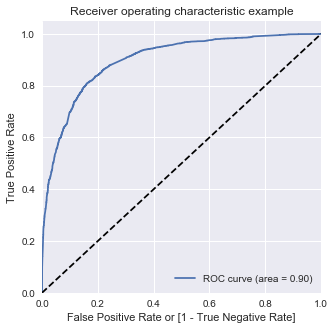

In [80]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

### Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [81]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.247781,8425,0,1,1,1,0,0,0,0,0,0,0
1,0,0.247781,8341,0,1,1,1,0,0,0,0,0,0,0
2,0,0.151498,7376,0,1,1,0,0,0,0,0,0,0,0
3,0,0.014608,7414,0,1,0,0,0,0,0,0,0,0,0
4,1,0.969130,3521,1,1,1,1,1,1,1,1,1,1,1


In [82]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.378020  1.000000  0.000000
0.1   0.1  0.643455  0.971596  0.444021
0.2   0.2  0.762672  0.925647  0.663620
0.3   0.3  0.813517  0.849624  0.791571
0.4   0.4  0.828675  0.784879  0.855293
0.5   0.5  0.826149  0.725146  0.887535
0.6   0.6  0.814622  0.634503  0.924092
0.7   0.7  0.799779  0.555138  0.948464
0.8   0.8  0.771356  0.441520  0.971820
0.9   0.9  0.729354  0.299499  0.990607


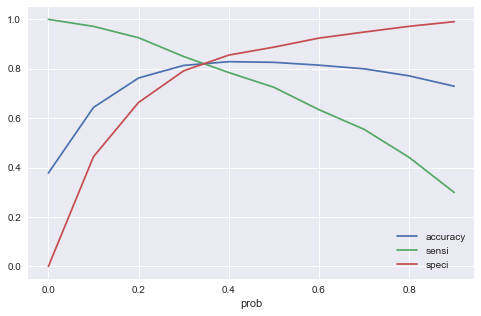

In [83]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
sns.set(rc={'figure.figsize':(8,5)})
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [84]:
#### From the curve above, 0.35 is the optimum point to take it as a cutoff probability.
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.247781,8425,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.247781,8341,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.151498,7376,0,1,1,0,0,0,0,0,0,0,0,0
3,0,0.014608,7414,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0.969130,3521,1,1,1,1,1,1,1,1,1,1,1,1


In [85]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8247276172430128

In [86]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3273,  666],
       [ 444, 1950]], dtype=int64)

In [87]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [88]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8145363408521303

In [89]:
# Let us calculate specificity
TN / float(TN+FP)

0.8309215536938309

In [90]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.16907844630616908


In [91]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7454128440366973


In [92]:
# Negative predictive value
print (TN / float(TN+ FN))

0.880548829701372


### Probability of 0.35 suits more as the specificity is nearly 85% and sensitivity is more than 80%. We have leaned more towards sensitivity as the company wants to improve lead conversion rate.

## Making predictions on the test set

In [93]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [94]:
cols = features.columns
X_test = X_test[cols]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_LANDING PAGE SUBMISSION,Lead Origin_LEAD ADD FORM,Lead Source_OLARK CHAT,Lead Source_WELINGAK WEBSITE,Last Activity_HAD A PHONE CONVERSATION,Last Activity_OLARK CHAT CONVERSATION,Last Activity_SMS SENT,What is your current occupation_OTHER,What is your current occupation_STUDENT,What is your current occupation_WORKING PROFESSIONAL,Lead Profile_POTENTIAL LEAD,Lead Profile_STUDENT OF SOMESCHOOL,Last Notable Activity_MODIFIED,Last Notable Activity_UNREACHABLE
4462,0,-0.878510,0,0,1,0,0,0,1,0,0,0,1,0,0,0
5243,0,-0.582031,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4597,0,-0.086672,1,0,0,0,0,0,0,0,0,0,1,0,1,0
4680,0,-0.878510,0,1,0,1,0,0,1,0,0,0,0,0,0,0
5355,0,-0.878510,0,0,1,0,0,0,0,0,0,0,0,0,1,0


In [95]:
X_test_sm = sm.add_constant(X_test)

Applying prediction on the test set

In [96]:
y_test_pred = res.predict(X_test_sm)

In [97]:
y_test_pred[:10]

4462    0.885554
5243    0.057331
4597    0.308099
4680    0.995602
5355    0.117580
7071    0.049300
6314    0.965313
2688    0.998064
6228    0.173895
3014    0.101541
dtype: float64

In [98]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [99]:
# Let's see the head
y_pred_1.head()

,0
4462,0.885554
5243,0.057331
4597,0.308099
4680,0.995602
5355,0.117580


In [100]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [101]:
# Putting CustID to index
y_test_df['Prospect_ID'] = y_test_df.index

In [102]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [103]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [104]:
y_pred_final.head()

,Converted,Prospect_ID,0
0,1,4462,0.885554
1,0,5243,0.057331
2,1,4597,0.308099
3,1,4680,0.995602
4,0,5355,0.117580


In [105]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion_Prob'})

In [106]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['Prospect_ID','Converted','Conversion_Prob'], axis=1)

C:\Users\HELLO\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  


In [107]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect_ID,Converted,Conversion_Prob
0,4462,1,0.885554
1,5243,0,0.057331
2,4597,1,0.308099
3,4680,1,0.995602
4,5355,0,0.117580


In [108]:
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)

In [109]:
y_pred_final.head()

,Prospect_ID,Converted,Conversion_Prob,final_predicted
0,4462,1,0.885554,1
1,5243,0,0.057331,0
2,4597,1,0.308099,0
3,4680,1,0.995602,1
4,5355,0,0.117580,0


In [110]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8250460405156538

In [111]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1400,  281],
       [ 194,  840]], dtype=int64)

In [112]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [113]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8123791102514507

In [114]:
# Let us calculate specificity
TN / float(TN+FP)

0.8328375966686496

## So the sensitivity is more than 80% and Specificity is almost 85% for the test data also.

# Assigning a Lead Score. 

In [115]:
# Assigning lead_score based on the probablity we got. 
#Anything with the probability of 0.3 or higher will have lead score of 100. 
#The rest will be calculated as p * 100/0.3
def lead_score(x):
    if x >= 0.35:
        return round(100,0)
    else:
        return round(x * 100 / 0.35,0)
    

In [116]:
# Since we have already calculated probabilty. Lets us multiply that by 100 and round it to whole number.

y_train_lead_score = y_train_pred_final['Conversion_Prob'].apply(lead_score)
y_train_lead_score = pd.Series(y_train_lead_score)
y_train_lead_score.head(4)

0    71.0
1    71.0
2    43.0
3     4.0
Name: Conversion_Prob, dtype: float64

In [117]:
y_test_lead_score = y_pred_final['Conversion_Prob'].apply(lead_score)
y_test_lead_score = pd.Series(y_test_lead_score)
y_test_lead_score.head(4)

0    100.0
1     16.0
2     88.0
3    100.0
Name: Conversion_Prob, dtype: float64

In [118]:
X_train_final = pd.DataFrame()
X_train_final['Lead Score'] = y_train_lead_score
X_train_final.shape

(6333, 1)

In [119]:
X_train_bkup['Lead Score'] = X_train_final['Lead Score'].apply(lambda x:x)
X_train_bkup.shape

C:\Users\HELLO\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


(6333, 143)

In [120]:
X_test_final = pd.DataFrame()
X_test_final['Lead Score'] = y_test_lead_score
X_test_final.shape

X_test_bkup['Lead Score'] = X_test_final['Lead Score'].apply(lambda x:x)
X_test_bkup.shape

C:\Users\HELLO\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


(2715, 143)

In [121]:
Lead_score_df = pd.concat([X_train_bkup,X_test_bkup],axis=0)
Lead_score_df.shape

(9048, 143)

In [122]:
leads_final = pd.merge(leads_bkup,Lead_score_df[['Prospect ID','Lead Score']],on='Prospect ID',how='inner')
leads_final.shape

(9048, 19)

In [123]:
leads_final.to_csv("hot_leads.csv")